# Core ML: Bayesian NNs via MCMC


## Import libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

import warnings
warnings.filterwarnings("ignore")


## Prepare noisy XOR dataset

In [2]:
# Define function for simulating noisy XOR points

def simulate_xor(n=np.repeat(100, 4), s=0.5):
	x = np.vstack([
            # points corresponding to (0, 0)
            np.column_stack(
            	[np.random.rand(n[0]) - s, np.random.rand(n[0]) - s]),
            # points corresponding to (0, 1)
            np.column_stack(
            	[np.random.rand(n[1]) - s, np.random.rand(n[1]) + s]),
            # points corresponding to (1, 0)
            np.column_stack(
            	[np.random.rand(n[2]) + s, np.random.rand(n[2]) - s]),
            # points corresponding to (1, 1)
            np.column_stack(
            	[np.random.rand(n[3]) + s, np.random.rand(n[3]) + s])
	])

	y = np.repeat([0, 1, 1, 0], n)

	return x, y


In [3]:
# Initialize constants for dataset

num_classes = 4
num_training_samples = np.repeat(1200, num_classes)
num_test_samples = np.repeat(300, num_classes)

In [4]:
# Create train and test dataset

x_train, y_train = simulate_xor(n=num_training_samples)
x_test, y_test = simulate_xor(n=num_test_samples)

In [5]:
# Save train dataset to file

train_data_path = Path("data/train")

train_data_path.mkdir(parents=True, exist_ok=True)

np.savetxt(train_data_path.joinpath("x_train.csv"), x_train, delimiter=",", header="x1,x2", comments="")
np.savetxt(train_data_path.joinpath("y_train.csv"), y_train,
           delimiter=",", header="y", comments="")


In [6]:
# Save test dataset to file

test_data_path = Path("data/test")

test_data_path.mkdir(parents=True, exist_ok=True)

np.savetxt(test_data_path.joinpath("x_test.csv"), x_test,
           delimiter=",", header="x1,x2", comments="")
np.savetxt(test_data_path.joinpath("y_test.csv"), y_test,
           delimiter=",", header="y", comments="")


## Plot training and test data

<Figure size 460.8x460.8 with 0 Axes>

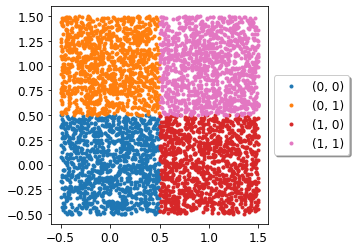

In [13]:
# Setting up plot design

num_training_samples_cumsum = np.hstack((0, num_training_samples)).cumsum()
cols = ['#1f77b4', '#ff7f0e', '#d62728', '#e377c2']
labels = ['(0, 0)', '(0, 1)', '(1, 0)', '(1, 1)']

plt.figure(figsize=[6.4, 6.4])

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

fig, ax = plt.subplots()

ax.set_box_aspect(1)

output_path = Path("data/imgs")
output_path.mkdir(parents=True, exist_ok=True)

# Plot training data

for i in range(num_classes):
    ax.plot(
        x_train[num_training_samples_cumsum[i]
            :num_training_samples_cumsum[i+1], 0],
        x_train[num_training_samples_cumsum[i]
            :num_training_samples_cumsum[i+1], 1],
        'o',
        color=cols[i],
        marker='o',
        markersize=3,
        label=str(i)
    )

plt.legend(labels=labels, loc='right', ncol=1,
           bbox_to_anchor=(1.4, 0.5), fancybox=True, shadow=True)


# Save plot for reference

plt.savefig(
    output_path.joinpath('noisy_xor_training_set.jpg'),
    pil_kwargs={'quality': 100},
    transparent=True,
    bbox_inches='tight',
    pad_inches=0.1
)


<Figure size 460.8x460.8 with 0 Axes>

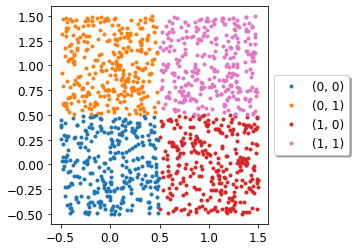

In [15]:
# Setting up plot design

num_test_samples_cumsum = np.hstack((0, num_test_samples)).cumsum()
cols = ['#1f77b4', '#ff7f0e', '#d62728', '#e377c2']
labels = ['(0, 0)', '(0, 1)', '(1, 0)', '(1, 1)']

plt.figure(figsize=[6.4, 6.4])

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

fig, ax = plt.subplots()

ax.set_box_aspect(1)

output_path = Path("data/imgs")
output_path.mkdir(parents=True, exist_ok=True)

# Plot training data

for i in range(num_classes):
    ax.plot(
        x_test[num_test_samples_cumsum[i]
            :num_test_samples_cumsum[i+1], 0],
        x_test[num_test_samples_cumsum[i]
                :num_test_samples_cumsum[i+1], 1],
        'o',
        color=cols[i],
        marker='o',
        markersize=3,
        label=str(i)
    )

plt.legend(labels=labels, loc='right', ncol=1,
           bbox_to_anchor=(1.4, 0.5), fancybox=True, shadow=True)


# Save plot for reference

plt.savefig(
    output_path.joinpath('noisy_xor_test_set.jpg'),
    pil_kwargs={'quality': 100},
    transparent=True,
    bbox_inches='tight',
    pad_inches=0.1
)


# Implementing distributions for MLP parameters